In [2]:
#kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #görselleştirme için
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

In [3]:
#veriyukleme
data_csv = r"D:\Masaüstü\ÜNİ\3_1\3.1_Projeler\Makine öğrenmesine giriş\machine\numeric.csv"
data = pd.read_csv(data_csv)
print(data)

     ilan   fiyati  sahip  yer  oda  balkon  yorum puanı  konum puanı  \
0     132  245.000    203   19    0       0         4.58          5.0   
1     207  324.000    152    8    0       0         4.66          4.8   
2     318  530.000    202   28    0       1         4.89          4.9   
3     326  348.000    219   28    0       1         4.45          4.3   
4     107  817.000    230   13    0       1         4.86          4.8   
..    ...      ...    ...  ...  ...     ...          ...          ...   
347   122    1.423     12   26    2       1         4.83          4.8   
348   219    1.404     30   26    5       1         5.00          4.9   
349     1  593.000     72    6    2       1         5.00          5.0   
350   335  950.000    111    6    1       1         4.90          4.8   
351   126  482.000      1    6    0       1         4.90          4.8   

     süper ev sahibi  değerlendirme sayısı  son değerlendirme  misafir  \
0                  0                    49       

In [5]:
#bağımlı ve bağımsız değişkeni ayırdık.
# kod her çalıştığında veri kümesinin aynı şekilde bölünmesini sağlar.(random_state)
X = data.drop(["fiyati","ilan","sahip","değerlendirme sayısı","son değerlendirme"], axis = 1 ) #ilan adı ve ev sahibi etkilemesin.
y = data["fiyati"]
print(X)


     yer  oda  balkon  yorum puanı  konum puanı  süper ev sahibi  misafir  \
0     19    0       0         4.58          5.0                0        2   
1      8    0       0         4.66          4.8                0        3   
2     28    0       1         4.89          4.9                1        3   
3     28    0       1         4.45          4.3                0        2   
4     13    0       1         4.86          4.8                1        3   
..   ...  ...     ...          ...          ...              ...      ...   
347   26    2       1         4.83          4.8                0        4   
348   26    5       1         5.00          4.9                1       10   
349    6    2       1         5.00          5.0                0        4   
350    6    1       1         4.90          4.8                1        3   
351    6    0       1         4.90          4.8                1        3   

     temizlik  
0         4.4  
1         4.5  
2         4.8  
3         4

In [6]:
#eğitim ve test seti ayırma.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=154)


In [7]:
#LinearRegression için model oluşturma
lr_model = LinearRegression()
model = lr_model.fit(X_train,y_train)

y_pred = lr_model.predict(X_test)

In [8]:
#grafiğimizi düzgün alabilmek için index numaralarına göre sıralattık.
X_train = X_train.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

In [9]:
from sklearn import metrics
print("------------------------------")
print("Linear r^2 degeri")
print("------------------------------")
print(r2_score(y_train,lr_model.predict(X_train)))
print("------------------------------")
print("Linear Regression RMSE degeri")#Root Mean Square Error(RMSE)
print("------------------------------")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("------------------------------")

------------------------------
Linear r^2 degeri
------------------------------
0.27350311881429845
------------------------------
Linear Regression RMSE degeri
------------------------------
283.6265092203217
------------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

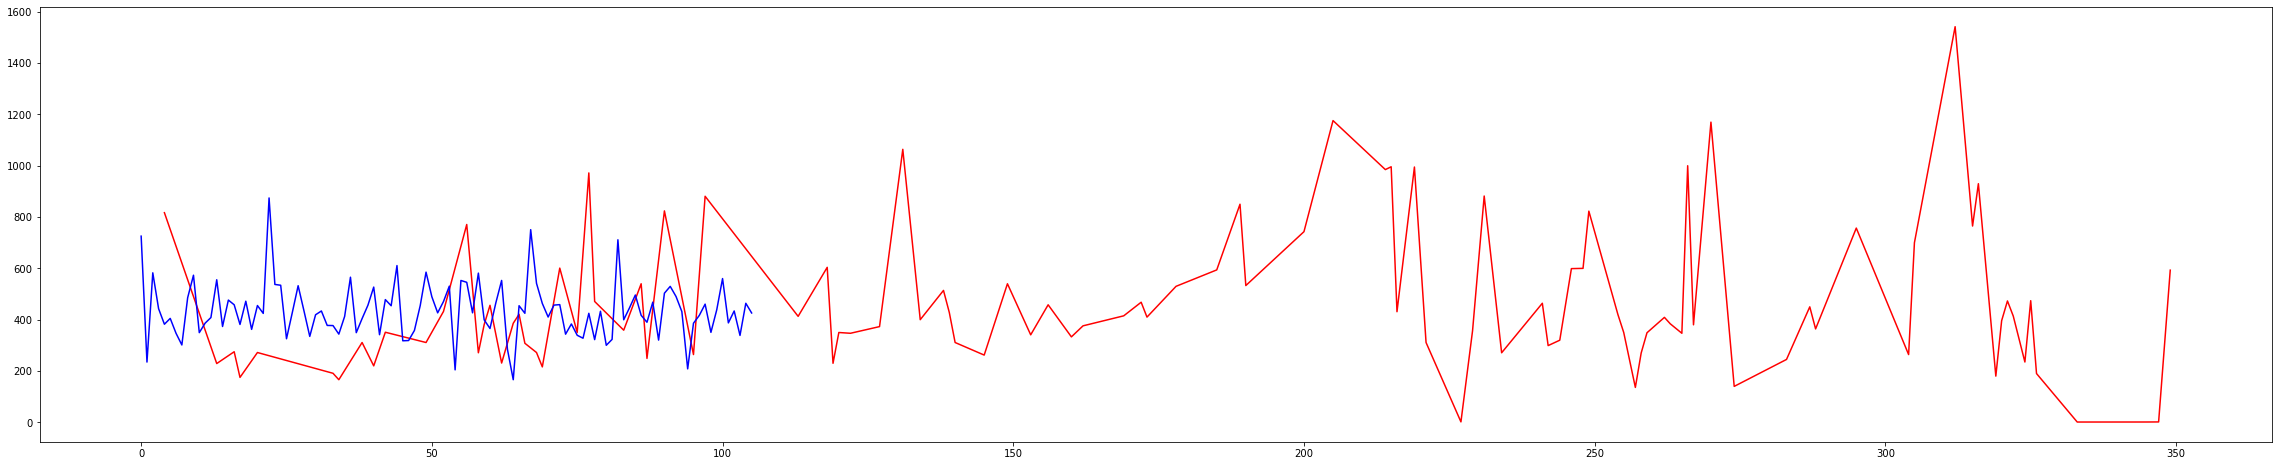

In [10]:
plt.figure(figsize=(40,8))
plt.plot(y_test,color='red')
plt.plot(y_pred,color='blue')
plt.show
